In [1]:
from matplotlib import pyplot as plt
from nltk.tokenize import sent_tokenize
import pandas as pd
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')
import numpy as np
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models import WordEmbeddingSimilarityIndex
from gensim.similarities import SparseTermSimilarityMatrix
from gensim.similarities import SoftCosineSimilarity
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
df=pd.read_csv('results1.csv')
summ=df.head(100)
summ.head()


,task,paper_id,title,summary,score,sentences
0,what is the immune system response to covid-19,40dabecefc2f0a2b750e000d1c15cca57a3f7dd4,ANIMAL VIRUSES OF ECONOMIC IMPORTANCE: GENETIC...,in broad terms the immune system among vertebr...,0.759182,[('in broad terms the immune system among vert...
1,what is the immune system response to covid-19,15bad8368522a05f32dee771e5a8259f0e9cbbfd,Title: The SARS-CoV-2 exerts a distinctive str...,while loop1 is also fluctuating in the covid-1...,0.753134,[('while loop1 is also fluctuating in the covi...
2,what is the immune system response to covid-19,2437ecdfe29ce5195079af809de646e9e1e1350a,Respiratory Viruses,the type of immune response to hrsv is a major...,0.748913,[('the type of immune response to hrsv is a ma...
3,what is the immune system response to covid-19,8cd6d7c2eeb732eeecb6b7618d02eafe82aa62a4,Viral Infection of Transgenic Mice Expressing ...,first the immune response to lcmv has been wel...,0.748436,[('first the immune response to lcmv has been ...
4,what is the immune system response to covid-19,6c3e1a43f0e199876d4bd9ff787e1911fd5cfaa6,Review Article Microbial Agents as Putative In...,among these lymphotoxin-α is particularly inte...,0.745530,[('among these lymphotoxin-α is particularly i...


In [21]:
def remove_stopwords(sen):     
    sen_new = " ".join([i for i in sen if i not in stop_words])          
    return sen_new

In [22]:
i=1
sentences = [] 
for s in summ['summary']: 
                   
        for x in(sent_tokenize(s)) :
            sentences.append(sent_tokenize(x))
#print(sentences)    
corpus = [y for x in sentences for y in x ]
#print(corpus)


clean_sentences = pd.Series(corpus).str.replace("[^a-zA-Z]", " ") 
        # make alphabets lowercase 

clean_sentences = [s.lower() for s in clean_sentences]
clean_sentences = [remove_stopwords(r.split()) for r in corpus]


In [23]:

# Extract word vectors 
word_embeddings = {} 
f = open(r"C:\meriem\Mémoire\glove6b\glove.6B.100d.txt", encoding='utf-8') 
for line in f: 
    values = line.split() 
    word = values[0] 
    coefs = np.asarray(values[1:], dtype='float32')    
    word_embeddings[word] = coefs 
f.close()

In [24]:
sentence_vectors = [] 
for i in clean_sentences: 
    if len(i) != 0: 
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001) 
    else: 
        v = np.zeros((100,)) 
    sentence_vectors.append(v)

In [27]:
sim_mat = np.zeros([len(corpus), len(corpus)])
for i in range(len(corpus)): 
      for j in range(len(corpus)): 
        if i != j: 
              sim_mat[i][j] = cosine_similarity (sentence_vectors[i].reshape(1,100), sentence_vectors[j].reshape(1,100))[0,0]

In [28]:
print( sim_mat)

[[0.         0.9027682  0.88523022 ... 0.83101579 0.84872056 0.81338857]
 [0.9027682  0.         0.88289545 ... 0.69471089 0.74003795 0.6849691 ]
 [0.88523022 0.88289545 0.         ... 0.84711935 0.82718086 0.75011976]
 ...
 [0.83101579 0.69471089 0.84711935 ... 0.         0.89505469 0.92978491]
 [0.84872056 0.74003795 0.82718086 ... 0.89505469 0.         0.86667056]
 [0.81338857 0.6849691  0.75011976 ... 0.92978491 0.86667056 0.        ]]


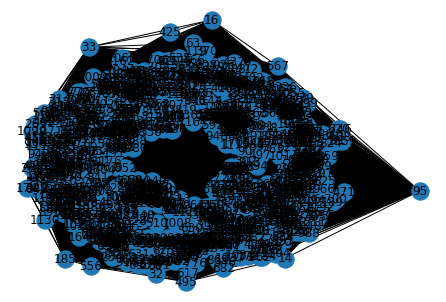

In [29]:
import networkx as nx 
import matplotlib.pyplot as plt

nx_graph = nx.from_numpy_array(sim_mat) 
nx.draw(nx_graph,with_labels=True)
scores = nx.pagerank(nx_graph)

In [30]:

ranked_sentences = sorted(((scores[i],s) for i,s in 
                           enumerate(corpus)), reverse=True)
# Extract top 10 sentences as the summary 
for i in range(12): 
      print(ranked_sentences[i][1])

however the dynamic of anti-sars-cov-2 antibody upon virus infection and their relation to disease status and outcome remains to be determined 5 here we evaluated antibody response within 35 days after symptom onset in laboratory-confirmed case with covid-19 as one component of an overall exaggerated immune activation in severe sars-cov-2 infection and developed an immune phenotyping based on late igg response and nlr that could help determine disease severity and clinical outcome of covid-19 patients.
due to this apparent similarity between the two viruses previous research that has provided an understanding of protective immune responses against sars-cov may potentially be leveraged to aid vaccine development for sars-cov-2.
the adaptive immune response to rv infection has been well characterized and studies have demonstrated that cd8+ t cells play a critical role in the timely clearance of a primary infection while b cells are crucial for resistance to re-infection .
lymphopenia neu